# Import Libraries and Cloning Dataset

In [ ]:
#Importing Necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [ ]:
#Cloning Dataset
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 33.45 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#Generating Paths for Dataset Directories
main_dir = '/content/datasets/Data'
train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#Getting the Names of Images by Generated Paths for Test and Train Data and Printing First 10 Image Names
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(175).jpg', 'COVID19(359).jpg', 'COVID-19 (52).jpg', 'COVID19(364).jpg', 'COVID-19 (196).jpg', 'COVID19(457).jpg', 'COVID19(564).jpg', 'COVID-19 (101).jpg', 'COVID19(361).jpg', 'COVID19(226).jpg']
['NORMAL(755).jpg', 'NORMAL(1406).jpg', 'NORMAL(649).jpg', 'NORMAL(694).jpg', 'NORMAL(1476).jpg', 'NORMAL(1280).jpg', 'NORMAL(857).jpg', 'NORMAL(387).jpg', 'NORMAL(1019).jpg', 'NORMAL(1362).jpg']
['COVID19(444).jpg', 'COVID19(379).jpg', 'COVID19(426).jpg', 'COVID19(177).jpg', 'COVID-19 (799).jpg', 'COVID19(129).jpg', 'COVID-19 (485).jpg', 'COVID19(449).jpg', 'COVID19(255).jpg', 'COVID-19 (570).jpg']
['NORMAL(1088).jpg', 'NORMAL(564).jpg', 'NORMAL(1094).jpg', 'NORMAL(566).jpg', 'NORMAL(1011).jpg', 'NORMAL(1366).jpg', 'NORMAL(219).jpg', 'NORMAL(1131).jpg', 'NORMAL(1513).jpg', 'NORMAL(1245).jpg']


In [ ]:
#Printing Number of Each Data Sets
print("train dataset covid images :", len(train_covid_names))
print("train dataset normal images :", len(train_normal_names))
print("test dataset covid images :", len(test_covid_names))
print("test dataset normal images :", len(test_normal_names))
print("Total train images :", len(train_covid_names + train_normal_names))
print("Total test images :", len(test_covid_names + test_normal_names))

train dataset covid images : 545
train dataset normal images : 1266
test dataset covid images : 167
test dataset normal images : 317
Total train images : 1811
Total test images : 484


# Data Visualization

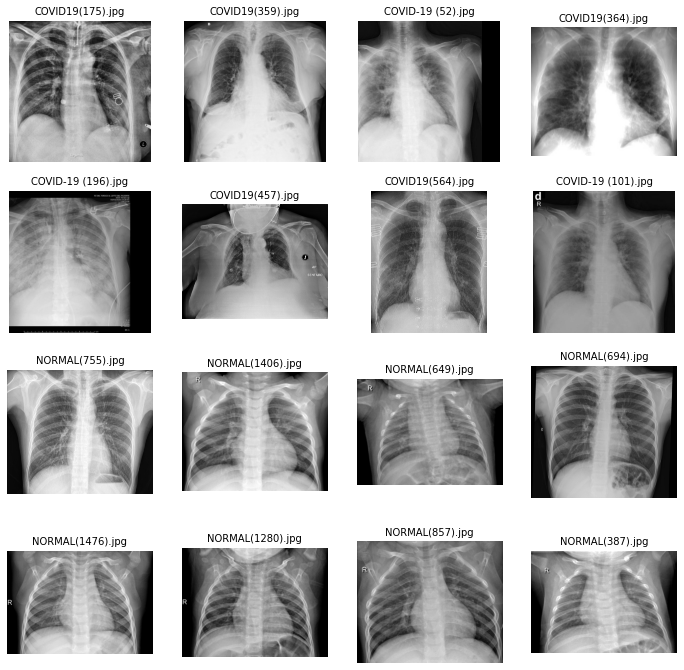

In [ ]:
#Setting the number of columns and rows
nrows = 4
ncols = 4

#Setting the Figure Size
fig = plt.gcf()
fig.set_size_inches(12, 12)

#Getting the Filenames from the Covid & Normal directories of the train dataset
next_covid_pic = [os.path.join(train_covid_dir,fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir,fname) for fname in train_normal_names[0:8]]

#Iterating Over Images and Displaying them
for i , img_path in enumerate(next_covid_pic + next_normal_pic):
    data = img_path.split('/', 6)[6]
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize = 10)
    plt.imshow(img, cmap = 'gray')
plt.show()

# Generating Train, Validation and Test Image Generators

In [ ]:
#Generator for Train Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)                               

#Generator for Validation Set
validation_datagen = ImageDataGenerator(rescale = 1./255)

#Generator for Test Set
test_datagen = ImageDataGenerator(rescale = 1./255)

#Getting Train Set and Setting Some Parameters
train_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150, 150),
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

#Getting Validation Set and Setting Some Parameters
validation_generator = train_datagen.flow_from_directory(train_dir ,
                                                    target_size = (150, 150),
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    class_mode = 'binary')

#Getting Test Set and Setting Some Parameters
test_generator = test_datagen.flow_from_directory(test_dir ,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#Printing Numerical Values for Each Class
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#Printing Shape of Images
train_generator.image_shape

(150, 150, 3)

# Modelling

In [ ]:
#Initializing Sequential Model
model = Sequential()
#Adding the Convolutional Layer
model.add(Conv2D(32, (5, 5), padding = 'SAME', activation = 'relu', input_shape = (150, 150, 3)))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout layer to prevent Overfitting
model.add(Dropout(0.5))
#Adding Convolutional Layer
model.add(Conv2D(64, (5, 5), padding = 'SAME', activation = 'relu'))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Flatten to make image 1 dimensional array
model.add(Flatten())
#Adding Dense Layer
model.add(Dense(256, activation = 'relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Dense Layer
model.add(Dense(1, activation = 'sigmoid'))
#Printing Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
#Compiling the Model
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Here, we have 2 callbacks. ModelCheckpoint saves the model during training based on the lowest val_loss value
my_check = ModelCheckpoint('X-RayModel.h5',
                           monitor = "val_loss",
                           mode = 'min',
                           save_best_only = True,
                           verbose = 1)
#EarlyStopping monitors val_loss in order to decide whether to continue training or not based on overfitting
early_stopper = EarlyStopping(monitor = 'val_loss', 
                              patience = 5, 
                              verbose = 1, 
                              mode = "min")

In [ ]:
#Training the Model
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    validation_steps = 10, 
                    callbacks = [my_check, early_stopper], 
                    verbose = 1)

Epoch 1/20
46/46 [==============================] - ETA: 0s - loss: 0.7047 - accuracy: 0.7743
Epoch 1: val_loss improved from inf to 0.38136, saving model to X-RayModel.h5
46/46 [==============================] - 143s 3s/step - loss: 0.7047 - accuracy: 0.7743 - val_loss: 0.3814 - val_accuracy: 0.8906
Epoch 2/20
46/46 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9186
Epoch 2: val_loss improved from 0.38136 to 0.17541, saving model to X-RayModel.h5
46/46 [==============================] - 139s 3s/step - loss: 0.2082 - accuracy: 0.9186 - val_loss: 0.1754 - val_accuracy: 0.9469
Epoch 3/20
46/46 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.9393
Epoch 3: val_loss improved from 0.17541 to 0.13084, saving model to X-RayModel.h5
46/46 [==============================] - 137s 3s/step - loss: 0.1758 - accuracy: 0.9393 - val_loss: 0.1308 - val_accuracy: 0.9563
Epoch 4/20
46/46 [==============================] - ETA: 0s - loss: 0.1318 - accuracy:

In [ ]:
#Printing Accuracy Metrics of the Model
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

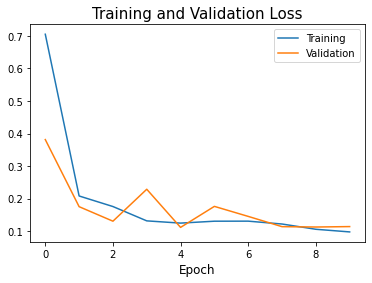

In [ ]:
#Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

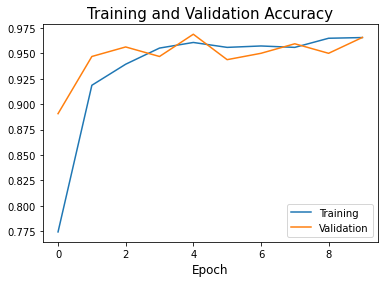

In [ ]:
#Plotting Training and Validation Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

In [ ]:
#Loading the Best Model that is Saved during Training Process
saved_model = load_model('X-RayModel.h5')

In [ ]:
#Predicting Test Data and Printing Test Accuracy and Loss
test_loss, test_accuracy = saved_model.evaluate(test_generator)
print('Test Accuracy :{} Test Loss:{}'.format(test_accuracy, test_loss))

16/16 [==============================] - 20s 1s/step - loss: 0.1431 - accuracy: 0.9483
Test Accuracy :0.9483470916748047 Test Loss:0.14309397339820862
